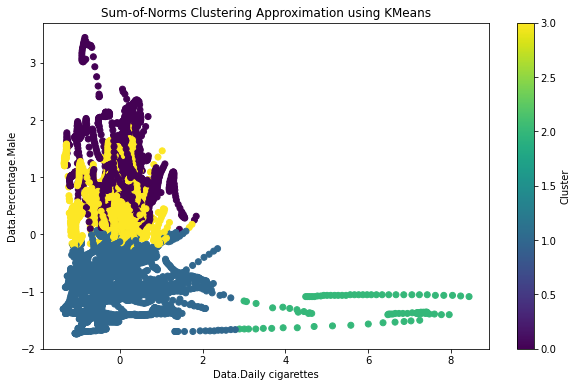

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Dataset
file_path = '/Users/dhruvtrivedi/Downloads/smoking.csv' 
data = pd.read_csv(file_path)

# Relevant columns for clustering
columns_to_use = ['Data.Daily cigarettes', 'Data.Percentage.Male', 'Data.Percentage.Female', 'Data.Percentage.Total']
clustering_data = data[columns_to_use]

# Standardizing the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
clusters = kmeans.fit_predict(clustering_data_scaled)


data['Cluster'] = clusters
plt.figure(figsize=(10, 6))
plt.scatter(clustering_data_scaled[:, 0], clustering_data_scaled[:, 1], c=clusters, cmap='viridis', marker='o')
plt.xlabel(columns_to_use[0])
plt.ylabel(columns_to_use[1])
plt.title('Sum-of-Norms Clustering Approximation using KMeans')
plt.colorbar(label='Cluster')
plt.show()



In [2]:
pip install cvxpy


Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import cvxpy as cp

def sum_of_norms_clustering(X, gamma):
    n, d = X.shape  # number of samples, number of features
    U = cp.Variable((n, d))  # cluster centroids
    F = cp.Variable((n*n, d))  # auxiliary variable for pairwise differences, flattened

    objective = 0.5 * cp.sum_squares(U - X) + gamma * cp.sum(cp.norm(F, axis=1))
    
    constraints = [F[i*n + j, :] == U[i, :] - U[j, :] for i in range(n) for j in range(n)]

    problem = cp.Problem(cp.Minimize(objective), constraints)
    problem.solve(solver=cp.SCS)

    return U.value

# data
file_path = '/Users/dhruvtrivedi/Downloads/smoking.csv'  
data = pd.read_csv(file_path)

# columns
columns_to_use = ['Data.Daily cigarettes', 'Data.Percentage.Male', 'Data.Percentage.Female', 'Data.Percentage.Total']
X = data[columns_to_use].values


subset_fraction = 0.01
X_subset = data.sample(frac=subset_fraction, random_state=42)[columns_to_use].values

# Standardizing the subset 
scaler = StandardScaler()
X_std_subset = scaler.fit_transform(X_subset)

# Regularization parameter gamma
gamma = 50 

# Sum-of-norms clustering on the subset
centroids_subset = sum_of_norms_clustering(X_std_subset, gamma)

# Assigning each data point to the nearest centroid
clusters_subset = np.argmin(np.linalg.norm(X_std_subset[:, None] - centroids_subset, axis=2), axis=1)

# adding the cluster assignments to the subset -> dataframe
data_subset = data.sample(frac=subset_fraction, random_state=42)
data_subset['Cluster'] = clusters_subset
data_subset.to_csv('smoking_with_clusters_subset.csv', index=False)


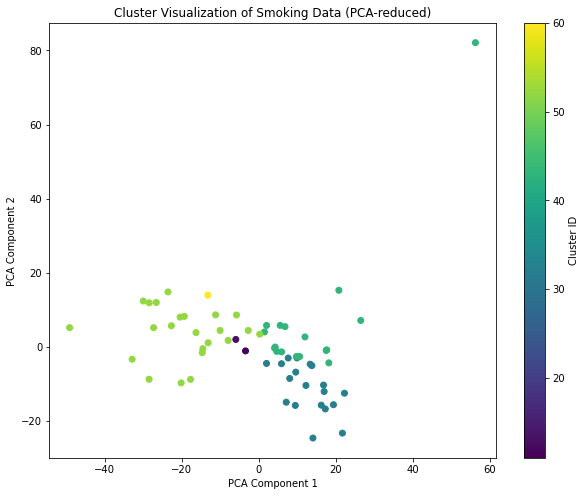

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the clustered data
file_path = 'smoking_with_clusters_subset.csv'
clustered_data = pd.read_csv(file_path)

# Extract the cluster assignments
clusters = clustered_data['Cluster']

# Let's use PCA to reduce the data to two dimensions for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(clustered_data[['Data.Daily cigarettes', 'Data.Percentage.Male', 'Data.Percentage.Female', 'Data.Percentage.Total']])

# Plot the reduced data with cluster coloring
plt.figure(figsize=(10, 8))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('Cluster Visualization of Smoking Data (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster ID')
plt.show()


PCA - linear transformation:

Each point in the plot here represents a data point (i.e., a country in a specific year), and the color represents the cluster assignment from the sum-of-norms clustering algorithm.

Cluster Points showing: they have similar characteristics in terms of daily cigarette consumption and percentages of male and female smokers.